# **Drive Mounting**

In [34]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Machine Learning/data_season.csv')
df

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif
...,...,...,...,...,...,...,...,...,...,...,...,...
3153,2013,Davangere,46990,3296.0,27.0,NaN,Drip,107809.0,53.5,Coconut,51239,Rabi
3154,2014,Davangere,103,3296.0,27.0,NaN,Drip,1132.0,52.5,Coconut,216396,Rabi
3155,2015,Davangere,8239,3550.0,27.0,NaN,Drip,23960.0,56.0,Coconut,2644,Rabi
3156,2016,Davangere,44563,3550.0,27.0,NaN,Drip,126487.0,57.0,Coconut,44235,Rabi


# **Data Processing**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3158 non-null   int64  
 1   Location     3158 non-null   object 
 2   Area         3158 non-null   int64  
 3   Rainfall     3158 non-null   float64
 4   Temperature  3158 non-null   float64
 5   Soil type    3100 non-null   object 
 6   Irrigation   3158 non-null   object 
 7   yeilds       3158 non-null   float64
 8   Humidity     3158 non-null   float64
 9   Crops        3158 non-null   object 
 10  price        3158 non-null   int64  
 11  Season       3158 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 296.2+ KB


In [7]:
object_cols = df.select_dtypes(include='object').columns
print("Object type columns:")
print(object_cols)

Object type columns:
Index(['Location', 'Soil type', 'Irrigation', 'Crops', 'Season'], dtype='object')


In [8]:
from sklearn.preprocessing import LabelEncoder

obj_cols = ['Location', 'Soil type', 'Irrigation', 'Crops', 'Season']

# LabelEncoder
le = LabelEncoder()
for col in obj_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [9]:
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nColumns with infinite values:")
print((df == float('inf')).sum())


Missing values per column:
Year           0
Location       0
Area           0
Rainfall       0
Temperature    0
Soil type      0
Irrigation     0
yeilds         0
Humidity       0
Crops          0
price          0
Season         0
dtype: int64

Columns with infinite values:
Year           0
Location       0
Area           0
Rainfall       0
Temperature    0
Soil type      0
Irrigation     0
yeilds         0
Humidity       0
Crops          0
price          0
Season         0
dtype: int64


In [10]:
#Split features and terget
X = df.drop('Season', axis=1)
y = df['Season']

In [11]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
df.head()

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
0,2004,8,1279,2903.1,27.0,0,1,2570.0,57.0,5,200000,0
1,2004,8,13283,2903.1,27.0,0,1,27170.0,57.5,5,4847,0
2,2004,8,52119,2903.1,27.0,0,1,114744.0,57.0,5,51239,0
3,2004,8,725,2996.6,27.0,0,1,1402.0,55.0,5,216396,0
4,2004,8,12885,2996.6,27.0,0,1,23456.0,56.0,5,2644,0


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# **Decision Tree**

In [14]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

#Predict
y_pred = clf.predict(X_test)

In [15]:
#Evaluation with Full Metrics Decision tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test,
                        clf.predict_proba(X_test),
                        multi_class='ovr',
                        average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.9193
Precision: 0.9201
Recall: 0.9193
F1 Score: 0.9196
ROC AUC Score: 0.9359
Balanced Accuracy: 0.9110
Matthews Corr Coef: 0.8647


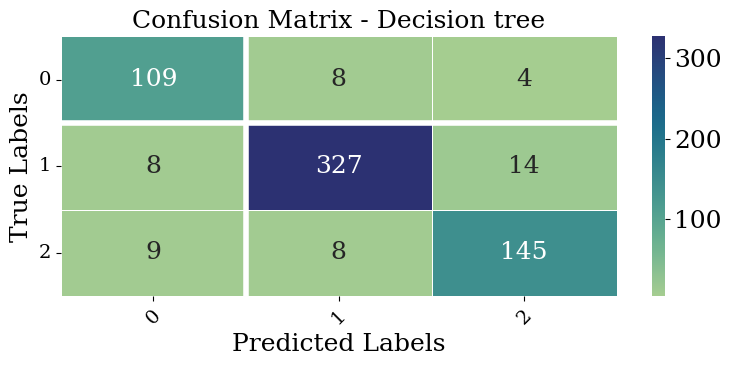

In [16]:
#Confusion Matrix Decision tree
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - Decision tree"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

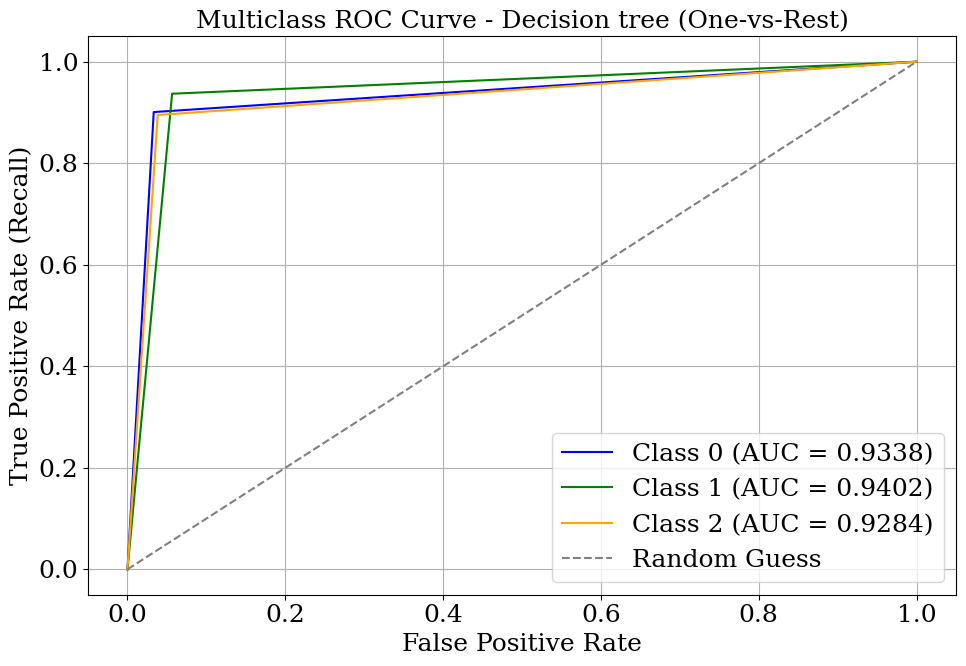

In [17]:
#Roc Curve Decision tree
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'orange', 'red', 'purple']  # One color per class

for idx, positive_class in enumerate(clf.classes_):
    # Get the column index of the current class
    class_index = list(clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = clf.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Decision tree (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Random Forest**

In [18]:
#Random Froest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)

In [19]:
#Evaluation with Full Metrics Random Froest
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test,
                        rf_clf.predict_proba(X_test),
                        multi_class='ovr',
                        average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.9478
Precision: 0.9508
Recall: 0.9478
F1 Score: 0.9474
ROC AUC Score: 0.9972
Balanced Accuracy: 0.9259
Matthews Corr Coef: 0.9124


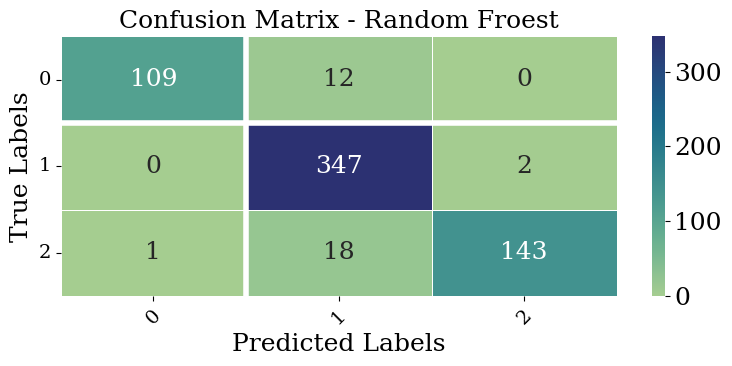

In [20]:
#Confusion Matrix Random Froest
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - Random Froest"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

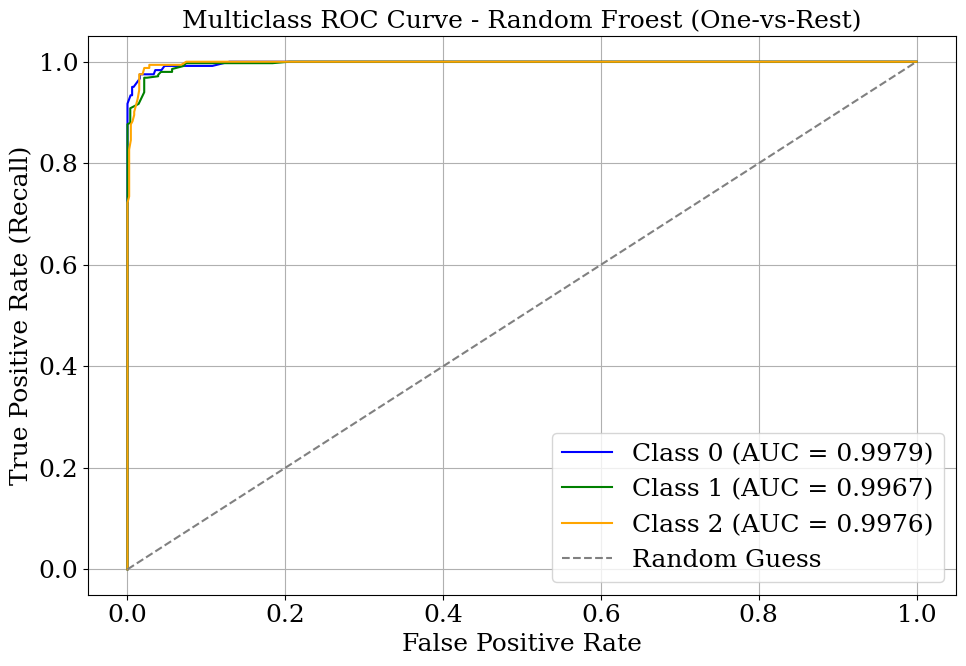

In [21]:
#Roc Curve Random Froest
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'orange', 'red', 'purple']  # One color per class

for idx, positive_class in enumerate(rf_clf.classes_):
    # Get the column index of the current class
    class_index = list(rf_clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = rf_clf.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Random Froest (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Gradient Boosting**

In [22]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

# Step 5: Predict
y_pred = gb_clf.predict(X_test)

In [23]:
#Evaluation with Full Metrics Random Froest
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test,
                        rf_clf.predict_proba(X_test),
                        multi_class='ovr',
                        average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.8528
Precision: 0.8685
Recall: 0.8528
F1 Score: 0.8488
ROC AUC Score: 0.9972
Balanced Accuracy: 0.7974
Matthews Corr Coef: 0.7509


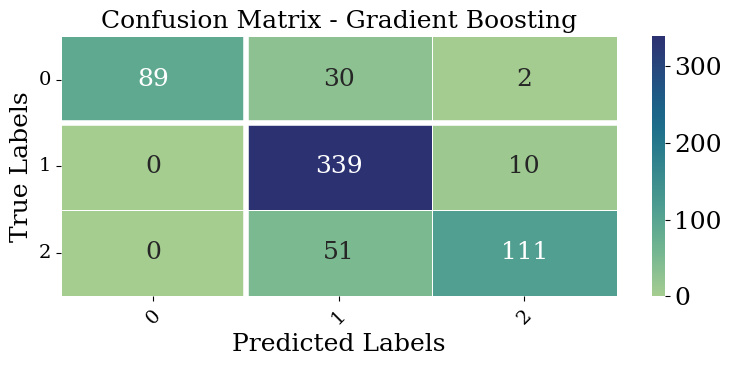

In [24]:
#Confusion Matrix Gradient Boosting
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - Gradient Boosting"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

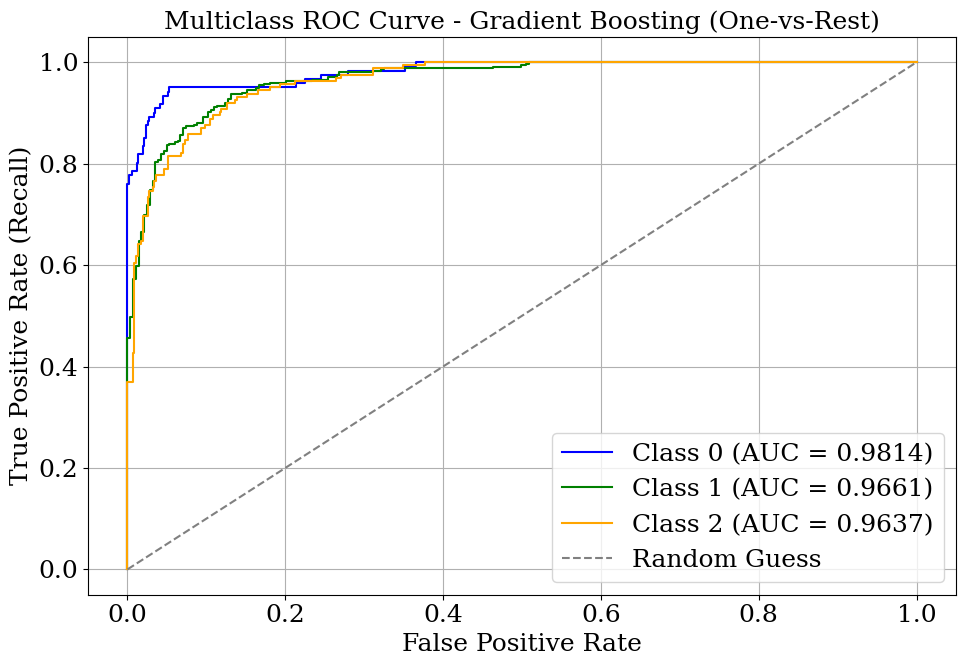

In [25]:
#Roc Curve Gradient Boosting
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'orange', 'red', 'purple']  # One color per class

for idx, positive_class in enumerate(gb_clf.classes_):
    # Get the column index of the current class
    class_index = list(gb_clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = gb_clf.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Gradient Boosting (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# **X-Gradient Boosting**

In [26]:
#xgb
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [27]:
#07.X-Gradient Boosting
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Predict
y_pred = xgb_clf.predict(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:59:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [28]:
#Evaluation with Full Metrics X-Gradient Boosting
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test,
                        xgb_clf.predict_proba(X_test),
                        multi_class='ovr',
                        average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.9858
Precision: 0.9857
Recall: 0.9858
F1 Score: 0.9857
ROC AUC Score: 0.9991
Balanced Accuracy: 0.9841
Matthews Corr Coef: 0.9760


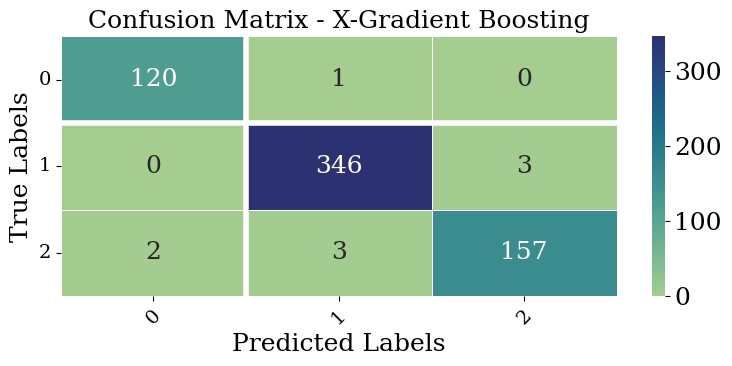

In [29]:
#Confusion Matrix X-Gradient Boosting
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - X-Gradient Boosting"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = np.unique(y_test) # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

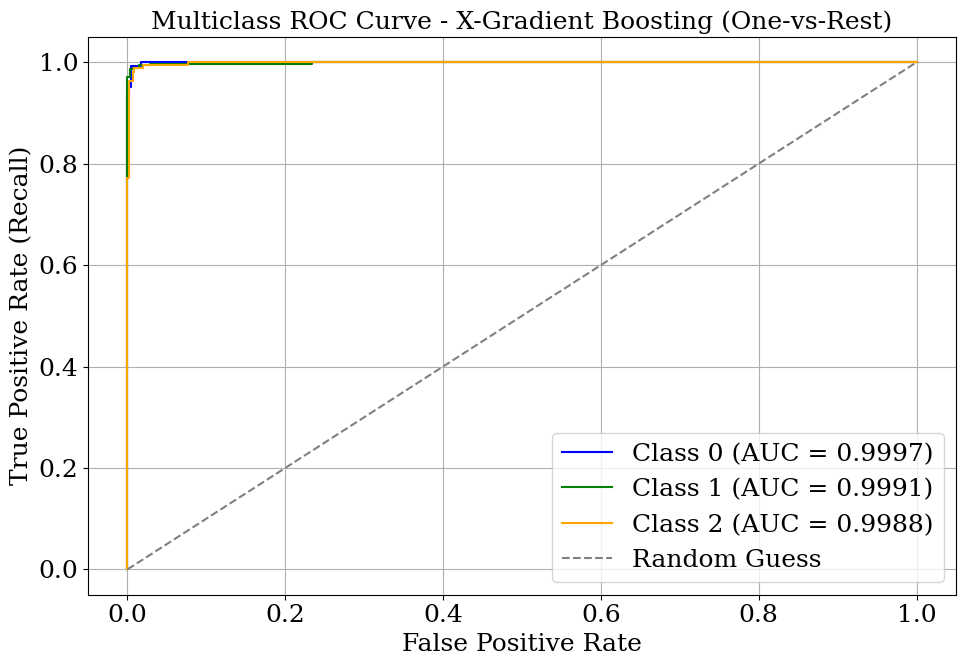

In [30]:
#Roc Curve X-Gradient Boosting
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'orange', 'red', 'purple']  # One color per class

for idx, positive_class in enumerate(xgb_clf.classes_):
    # Get the column index of the current class
    class_index = list(xgb_clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = xgb_clf.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - X-Gradient Boosting (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# **KNN**

In [31]:
#Knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 4: Predict
y_pred = knn.predict(X_test)

In [32]:
#Evaluation with Full Metrics KNN
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test,
                        knn.predict_proba(X_test),
                        multi_class='ovr',
                        average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.4525
Precision: 0.4540
Recall: 0.4525
F1 Score: 0.4496
ROC AUC Score: 0.5430
Balanced Accuracy: 0.3875
Matthews Corr Coef: 0.0725


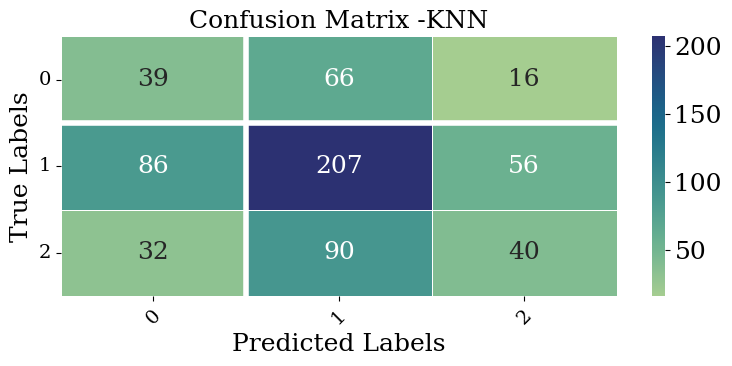

In [33]:
#Confusion Matrix KNN
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix -KNN"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
class_labels = np.unique(y_test)  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()